In [1]:
%matplotlib inline

# Python 速習 (その1)

## インストール

Python の Anacondaディストリビューション https://store.continuum.io/cshop/anaconda をダウンロードしてインストールしてください。
もしこれまでPythonを使ったことがない人は、Python 3 の最新版をインストールするようにしてください。まだ 2.7 という人は移行をおすすめします。

MacやLinuxを使っている人は pyenv を使いましょう。詳細は検索してください。

## 起動

Windows ならコマンドプロンプトやPowerShellで、MacやLinuxの人はターミナルで

    ipython

と打ち込んでエンター（リターン）を叩いてください。こんな感じに表示されれば成功です。

    Python 3.4.3 |Anaconda 2.1.0 (x86_64)| (default, Mar  6 2015, 12:07:41)
    Type "copyright", "credits" or "license" for more information.
    
    IPython 3.1.0 -- An enhanced Interactive Python.
    Anaconda is brought to you by Continuum Analytics.
    Please check out: http://continuum.io/thanks and https://binstar.org
    ?         -> Introduction and overview of IPython's features.
    %quickref -> Quick reference.
    help      -> Python's own help system.
    object?   -> Details about 'object', use 'object??' for extra details.


## 実験

ためしに次のように打ち込んでください。`numpy`は数値計算のためのデータ構造や関数を定義しているライブラリです。

シャープ記号 # のあとに続く文字はコメントです。打ち込む必要はありません。

In [2]:
import numpy as np
import matplotlib.pyplot as plt

`matplotlib.pyplot`は2次元の可視化のためのライブラリです。これらをインポートして使えるようにします。`as ...` と書いたのは、打ち込む文字数を減らすための別名を定義しています。

In [3]:
x = np.linspace(0, 2 * np.pi, 100)

In [4]:
x[:10] # ベクトルの最初の10個の要素

array([ 0.        ,  0.06346652,  0.12693304,  0.19039955,  0.25386607,
        0.31733259,  0.38079911,  0.44426563,  0.50773215,  0.57119866])

In [5]:
x[-10:] # ベクトルの最後の10個の要素

array([ 5.71198664,  5.77545316,  5.83891968,  5.9023862 ,  5.96585272,
        6.02931923,  6.09278575,  6.15625227,  6.21971879,  6.28318531])

In [6]:
y = - x * np.sin(3 * x) + np.cos(20 * x)

In [7]:
y[:10]

array([ 1.        ,  0.28490926, -0.87085283, -0.88899087,  0.18169857,
        0.73949518, -0.11062812, -1.28972589, -1.25242151, -0.14996967])

In [8]:
y[-10:]

array([ 6.06926187,  5.02364708,  4.81634628,  5.60475827,  5.85762683,
        4.51759288,  2.50795558,  1.46437126,  1.4740099 ,  1.        ])

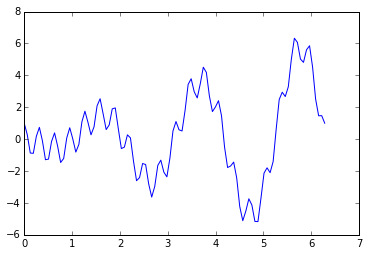

In [9]:
plt.plot(x, y)

このノートでは図をinline表示にしているのですでに描画されていますが、普通は `plt.show()` を実行します。

In [10]:
plt.show() 

## スクリプトファイルの作成

まず、自分がどこのディレクトリ（フォルダ）にいるかを確認するために、`pwd` コマンドを IPython のシェルに打ち込んでみてください。`%` が付いているのはIPythonのマジックコマンドと呼ばれるものです。`%` は省略できますが省略しないように習慣づける方がいいでしょう。

In [11]:
%pwd

'/Users/kenjisato/Dropbox/Lectures/EconDynamics/Codes/2015-04-06'

このディレクトリの中にどんなファイルがあるかを調べるには、`ls` コマンドを使います。ここでは, 同じディレクトリの中に、 `script.py` というPythonスクリプトファイルを置いています。

In [12]:
%ls

note.ipynb  script.py


`script.py` の内容は次のようにしています。

In [13]:
%cat script.py

import numpy as np
import matplotlib.pyplot as plt

x = np.random.random(100)
noise = np.random.randn(100)
y = 2 * x + noise

plt.plot(x, y, marker="o", linestyle='')
plt.show()

これをIPython上で実行するには、`%run` を使います。

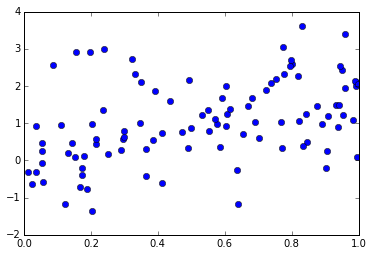

In [14]:
%run script

IPython上で`%run`を実行すると、コード中の変数`independent`, `dependent`, `noise` にあとからアクセスできるので非常に便利です。

In [15]:
noise[:10]

array([ 0.99725608,  0.17873433, -1.20905982, -0.01820169,  1.06901825,
        2.59307571, -0.74255854, -0.29851885, -1.4331102 , -0.3337276 ])

テキストエディタでスクリプトを書いて、IPythonで実行し、うまく行かなければIPython上でデータの中身を確認しながら修正していく、というのがPythonプログラミングの典型的な作業になります。

## 瞬時効用関数の可視化

経済のファンダメンタルな要件を
\begin{align}
    f(k) = A k^\alpha\\
    U(c) = 1 - e^{-c}
\end{align}
として、1部門モデルの既約型効用関数
\begin{align}
    u(x, y) = U(f(x) - y)
\end{align}
をPythonで表現してみます。

In [16]:
A = 1.3

In [17]:
α = 0.3

In [18]:
def f(k):
    return A * k ** α

In [19]:
def U(c):
    return 1 - np.exp(-c)

In [20]:
def u(x, y):
    return U(f(x) - y)

$u$ は2変数関数なので可視化のための馴染みのある方法は無差別曲線（等高線）を引くことでしょう。Pythonでは次のようにやります。

In [21]:
x = np.linspace(0.0, 10.0, 100)

In [22]:
y = np.linspace(0.0, f(10.0), 100)

In [23]:
X, Y = np.meshgrid(x, y)

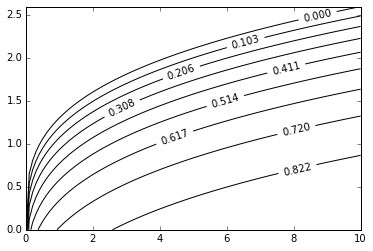

In [24]:
c = plt.contour(X, Y, u(X, Y), levels=np.linspace(0, u(10,0), 10), colors='k')
plt.clabel(c, inline=1, fontsize=10)
plt.show()